In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
#Read Csv file
car_df = pd.read_csv("../../Ai_Applications/CarPrice_Predection/Dataset/CarPrice_Assignment.csv")
print(car_df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

# Data Cleaning

In [76]:
#Checking null values or find missing data
car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [92]:
#Check type of columns
car_df.dtypes

car_ID                     int64
symboling                  int64
fueltype                   int32
aspiration                 int32
doornumber                 int32
drivewheel                 int32
enginelocation             int32
wheelbase                float64
carlength                float64
carwidth                 float64
carheight                float64
curbweight                 int64
enginesize                 int64
boreratio                float64
stroke                   float64
compressionratio         float64
horsepower                 int64
peakrpm                    int64
citympg                    int64
highwaympg                 int64
enginetype_dohc          float64
enginetype_dohcv         float64
enginetype_l             float64
enginetype_ohc           float64
enginetype_ohcf          float64
enginetype_ohcv          float64
enginetype_rotor         float64
cylindernumber_eight     float64
cylindernumber_five      float64
cylindernumber_four      float64
cylindernu

In [78]:
#Checking the unique values of object type
objectTypes = car_df.select_dtypes(include=object)
print(objectTypes.columns)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [79]:
for x in objectTypes:
    print(pd.unique(car_df[x]))

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [80]:
# Applying label encoder for columns with few values

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
car_df['fueltype'] = label.fit_transform(car_df['fueltype'])
car_df['aspiration'] = label.fit_transform(car_df['aspiration'])
car_df['doornumber'] = label.fit_transform(car_df['doornumber'])
car_df['drivewheel'] = label.fit_transform(car_df['drivewheel'])
car_df['enginelocation'] = label.fit_transform(car_df['enginelocation'])

In [81]:
#One-Hot encoding
from sklearn.preprocessing import OneHotEncoder



# Select the categorical columns to be one-hot encoded
cat_cols = ['enginetype', 'cylindernumber', 'fuelsystem', 'carbody']

# Create an instance of the OneHotEncoder class
onehot_enc = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the selected columns
onehot_arr = onehot_enc.fit_transform(car_df[cat_cols]).toarray()

# Create new column names based on the original column names and categories
new_cols = [f"{col}_{val}" for col in cat_cols for val in onehot_enc.categories_[cat_cols.index(col)]]

# Create a new DataFrame from the one-hot encoded array and column names
onehot_df = pd.DataFrame(onehot_arr, columns=new_cols)

# Merge the one-hot encoded DataFrame with the original DataFrame
car_df = pd.concat([car_df, onehot_df], axis=1)

# Drop the original categorical columns
car_df = car_df.drop(columns=cat_cols)



In [82]:
print(car_df.head())

   car_ID  symboling                   CarName  fueltype  aspiration  \
0       1          3        alfa-romero giulia         1           0   
1       2          3       alfa-romero stelvio         1           0   
2       3          1  alfa-romero Quadrifoglio         1           0   
3       4          2               audi 100 ls         1           0   
4       5          2                audi 100ls         1           0   

   doornumber  drivewheel  enginelocation  wheelbase  carlength  ...  \
0           1           2               0       88.6      168.8  ...   
1           1           2               0       88.6      168.8  ...   
2           1           2               0       94.5      171.2  ...   
3           0           1               0       99.8      176.6  ...   
4           0           0               0       99.4      176.6  ...   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0             0.0             0.0              1.0             

In [83]:
car_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon'],
      dtype='object')

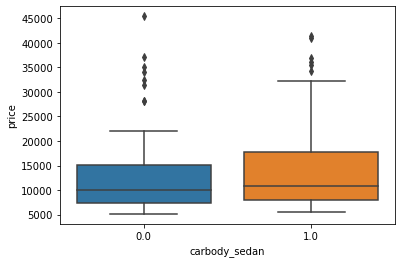

In [84]:
#Check Outliers
import seaborn as sns

# Load data
df = sns.load_dataset('iris')

# Create box plot
sns.boxplot(x= car_df['carbody_sedan'], y= car_df['price'],data=car_df)

# Show plot
plt.show()

In [85]:
car_df.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.902439,0.180488,0.439024,1.326829,0.014634,98.756585,174.049268,65.907805,...,0.097561,0.004878,0.458537,0.043902,0.004878,0.029268,0.039024,0.341463,0.468293,0.121951
std,59.322565,1.245307,0.297446,0.385535,0.497483,0.556171,0.120377,6.021776,12.337289,2.145204,...,0.297446,0.069843,0.499498,0.205380,0.069843,0.168970,0.194127,0.475361,0.500215,0.328031
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,94.500000,166.300000,64.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,97.000000,173.200000,65.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,154.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.000000,102.400000,183.100000,66.900000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,205.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,120.900000,208.100000,72.300000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
print(car_df.loc[:, car_df.columns != 'CarName'])


     car_ID  symboling  fueltype  aspiration  doornumber  drivewheel  \
0         1          3         1           0           1           2   
1         2          3         1           0           1           2   
2         3          1         1           0           1           2   
3         4          2         1           0           0           1   
4         5          2         1           0           0           0   
..      ...        ...       ...         ...         ...         ...   
200     201         -1         1           0           0           2   
201     202         -1         1           1           0           2   
202     203         -1         1           0           0           2   
203     204         -1         0           1           0           2   
204     205         -1         1           1           0           2   

     enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem_idi  \
0                 0       88.6      168.8      64.1  ...   

In [87]:
car_df = car_df.loc[:, car_df.columns != 'CarName']
column_to_move =  car_df.pop('price')

<Figure size 3600x3600 with 0 Axes>

In [88]:
car_df.insert(47, 'price', column_to_move)

     car_ID  symboling  fueltype  aspiration  doornumber  drivewheel  \
0         1          3         1           0           1           2   
1         2          3         1           0           1           2   
2         3          1         1           0           1           2   
3         4          2         1           0           0           1   
4         5          2         1           0           0           0   
..      ...        ...       ...         ...         ...         ...   
200     201         -1         1           0           0           2   
201     202         -1         1           1           0           2   
202     203         -1         1           0           0           2   
203     204         -1         0           1           0           2   
204     205         -1         1           1           0           2   

     enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem_mfi  \
0                 0       88.6      168.8      64.1  ...   

<AxesSubplot:>

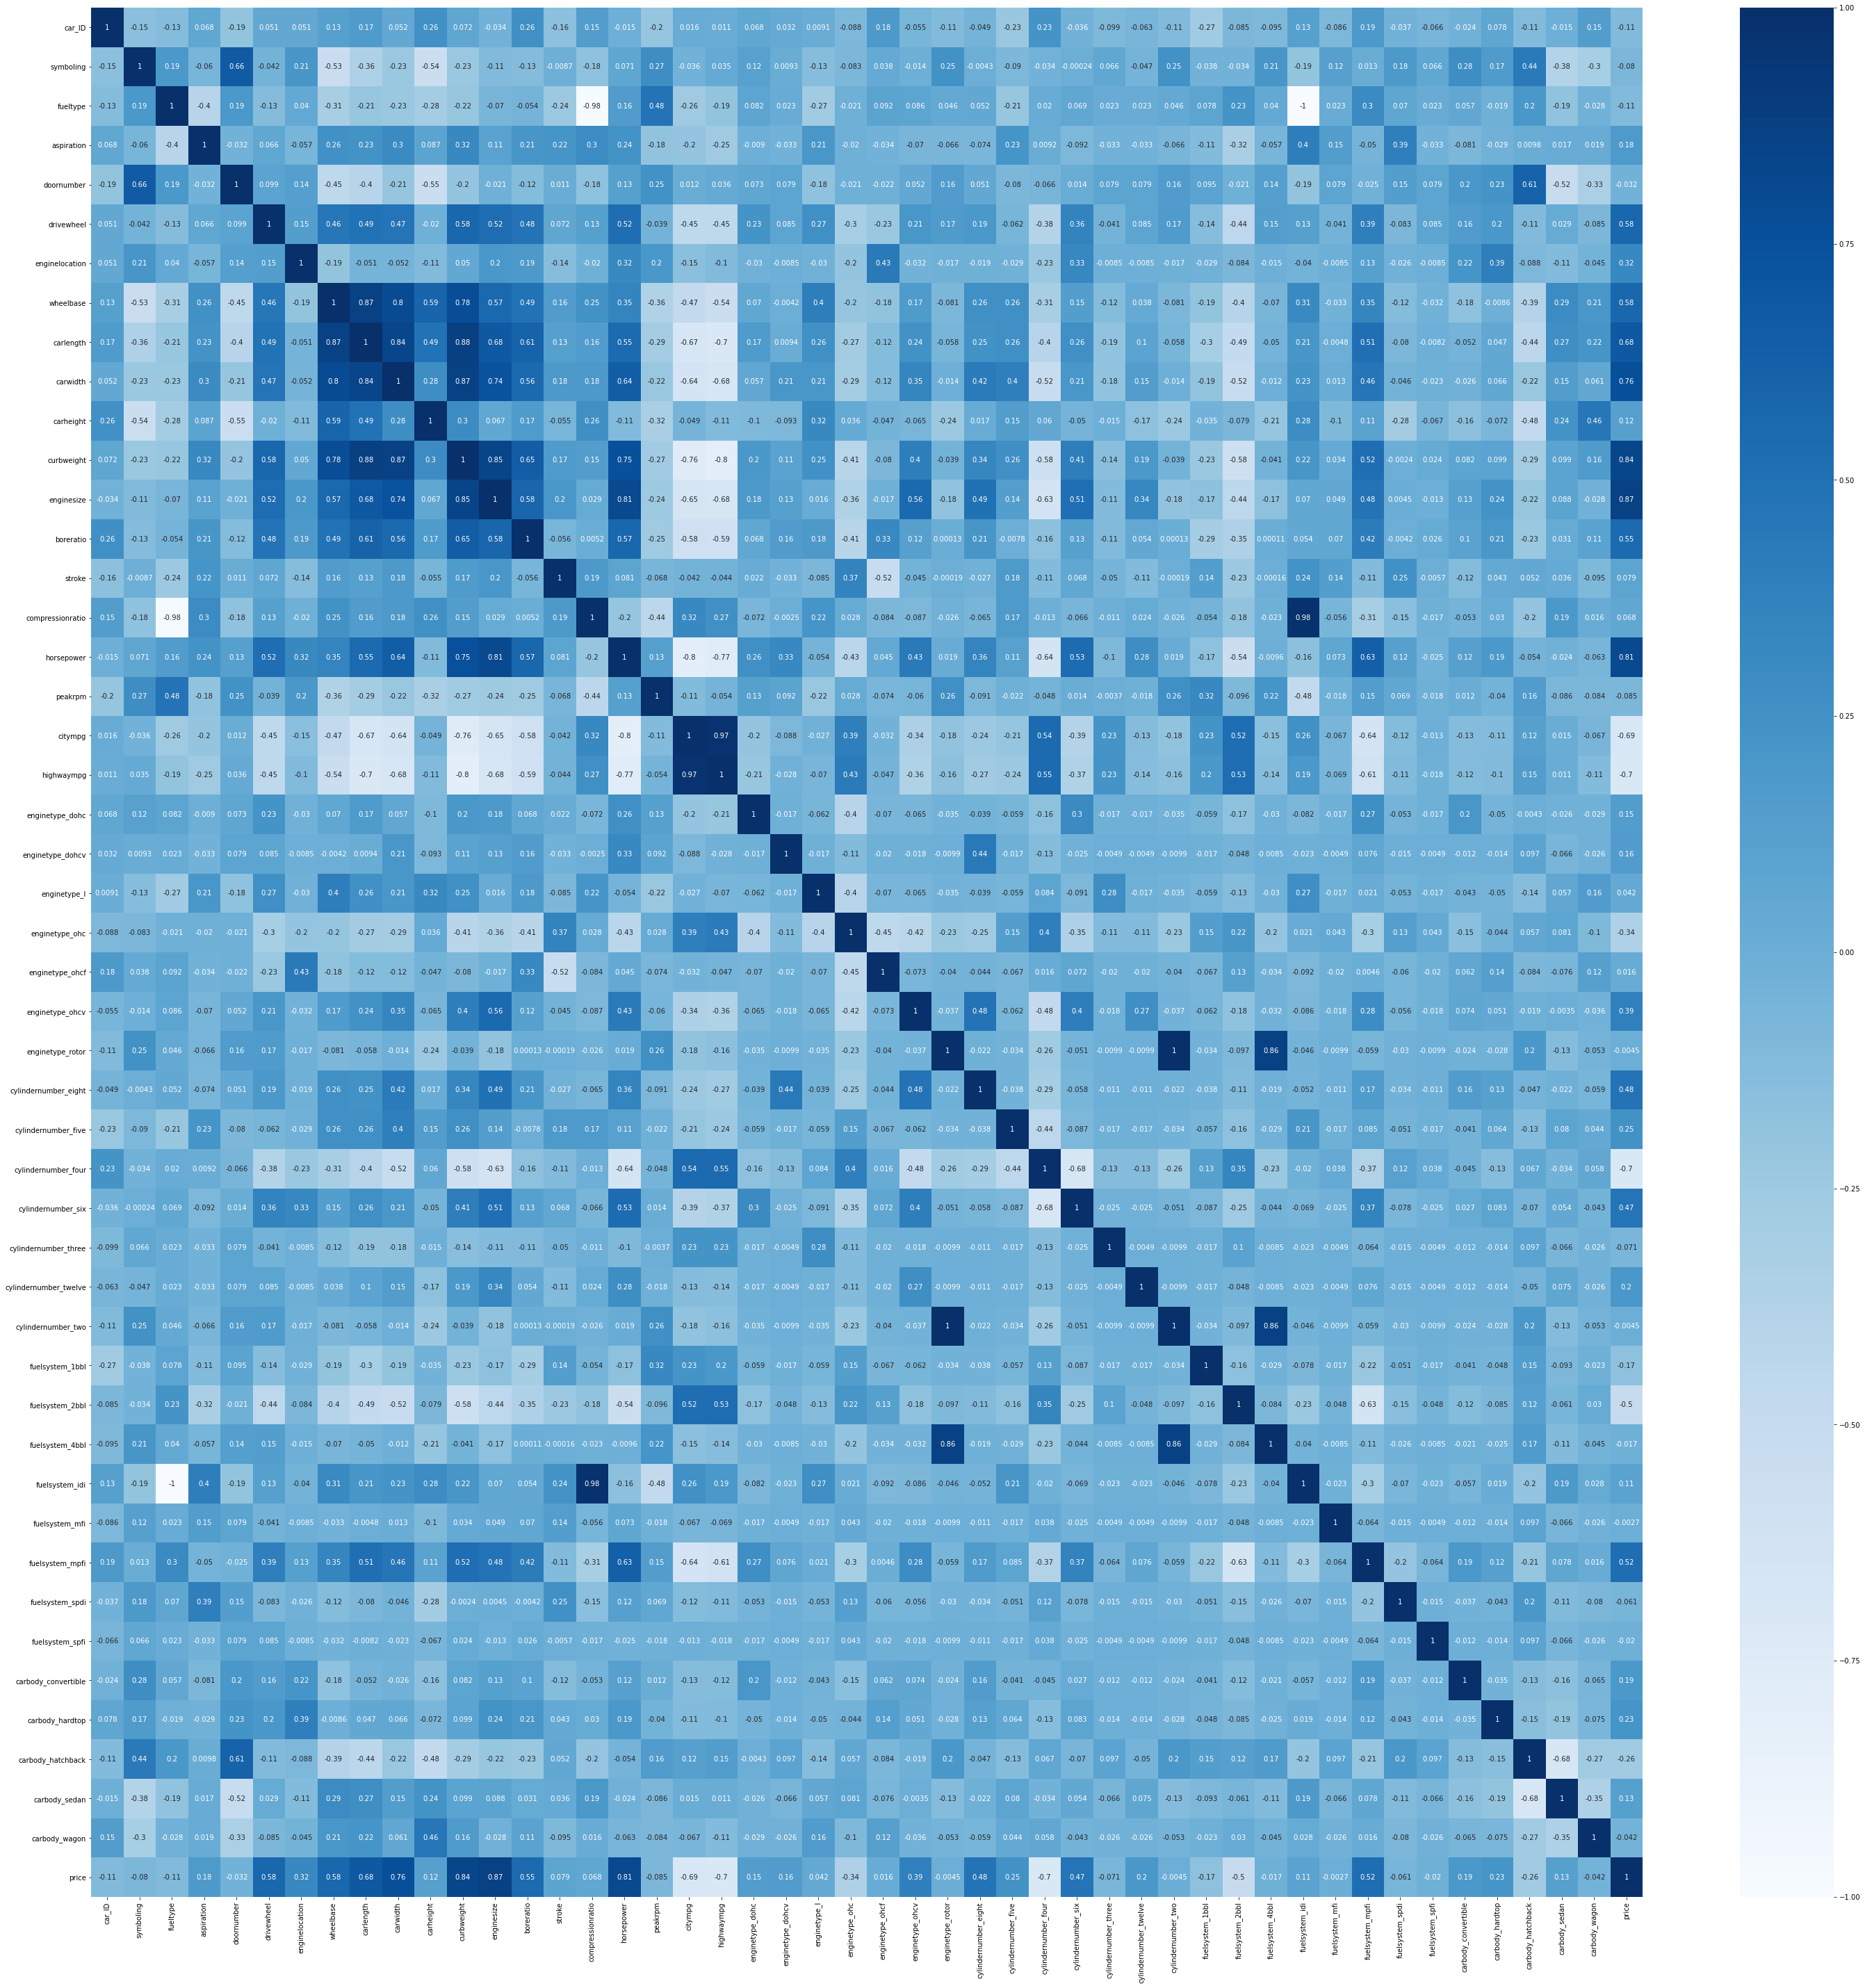

In [91]:
print(car_df)
plt.figure(figsize=(50, 50))
sns.heatmap(car_df.corr(), annot=True, cmap='Blues')

In [96]:
car_df = car_df.drop(columns= ['enginetype_rotor','citympg','compressionratio'])

<AxesSubplot:>

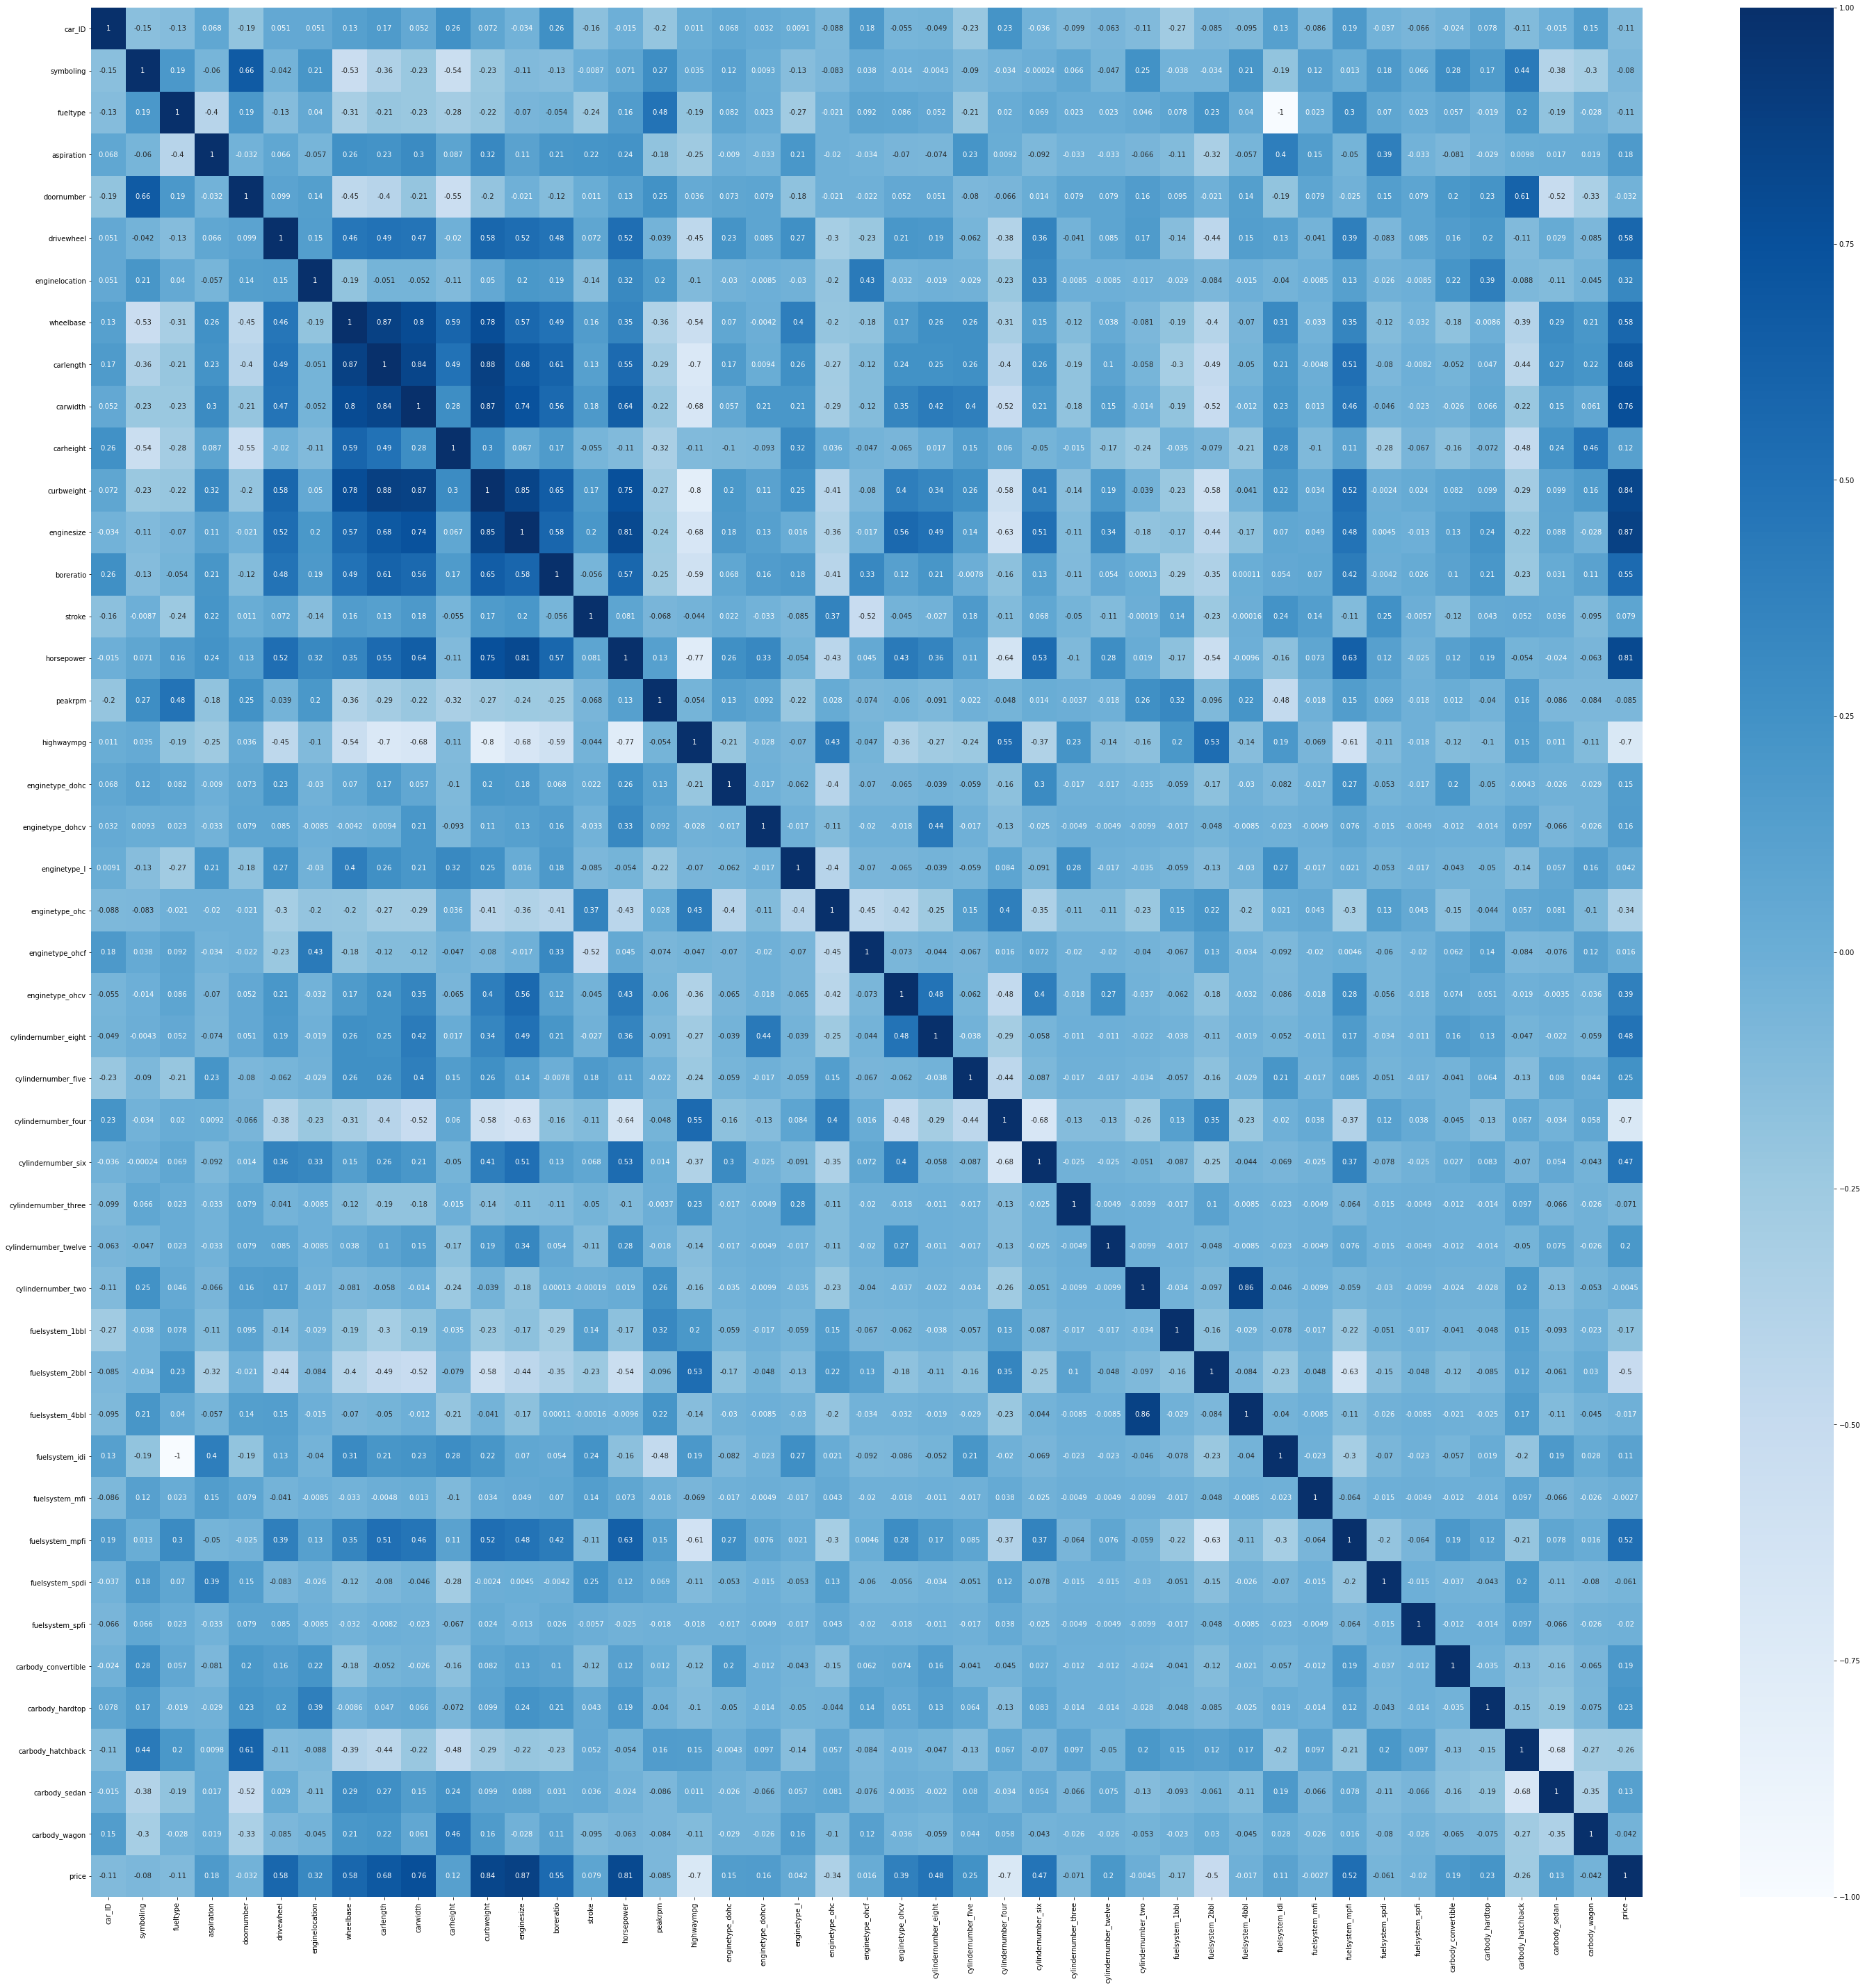

In [97]:
plt.figure(figsize=(50, 50))
sns.heatmap(car_df.corr(), annot=True, cmap='Blues')